**Before starting this file please first check the analysis part(Analysis.ipynb). Here we will use mechine learning algorithms using "Mod_1_train" and "Mod_1_test" data sets**   

# Import necessary package

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# This function will import data set
def import_data(data):
    df = pd.read_csv(data)
    return df

In [3]:
train = import_data('Mod_1_tran.csv') # import train data
test = import_data('Mod_1_test.csv') # Import test data

In [4]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [5]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


Our data sets have been cleaned and organised. So, we can directly use these data sets in the algorithm. 

* Our target feature is "Survived"
* Its a binary classification (0 or 1) (death or alive)
* So, We need classification algorithms

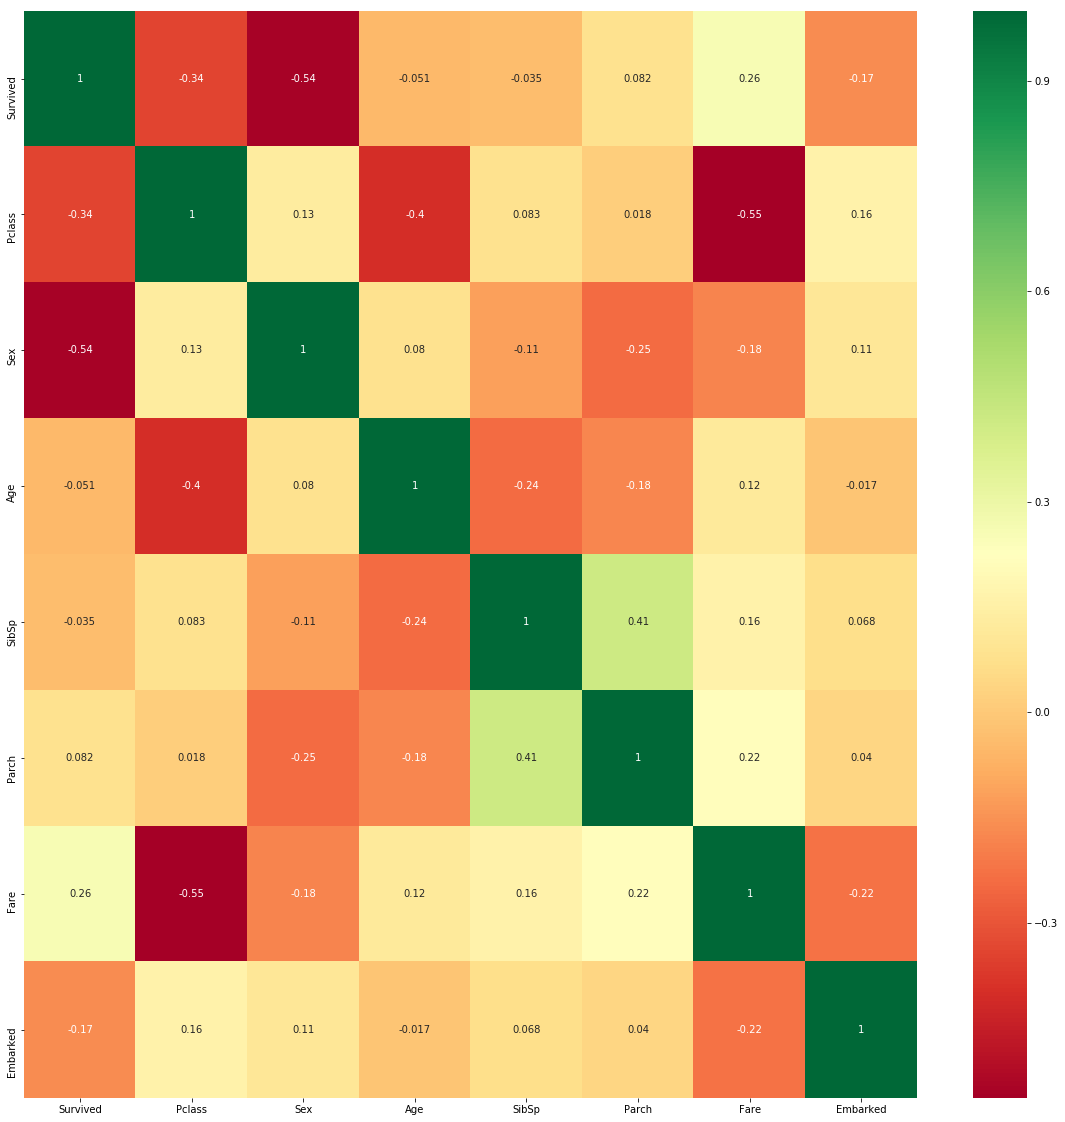

In [6]:
corrmat = train.corr() # Find Corr
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Task

* **Separate target collum from tha train data set**
* **Split train datasets into (80-20)% (train and test)**
* **Use this spliling train data in algorithm**
* **Use this spliting test data for cheking the accuracy of the algorithm**
* **Scale data if needed then again train and check accuracy**
* **Use grid search for getting best parameters**

In [7]:
X = train.drop('Survived',axis=1).values
y = train['Survived'].values

In [8]:
# Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
# Scale data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [10]:
Sc_X = sc.fit_transform(X) 
sc_X_train = sc.fit_transform(X_train)
sc_X_test = sc.fit_transform(X_test)

**Algorithm : Logistic Regression**

In [11]:
# Import package for Logistic regression
from sklearn.linear_model import LogisticRegression

**Confusion Matrix and accuracy**

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

**This function will give us confution matrix,accuracy score and Mean cross validation score**

In [13]:

def model_evalution(model_name,model,X_train,X_test,y_train,y_test):
    clf = model
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    print("Evolution of ",model_name)
    print("Confution metrix : ","\n",confusion_matrix(y_test,pred))
    print("Accuracy Score : ",accuracy_score(y_test,pred))
    print("Cross validation mean score : ",cross_val_score(LogisticRegression(),X_train,y_train,cv=10,scoring='accuracy').mean())
    
    

**This function will return us the best parameter**

In [14]:
# We use grid search to find best perameter
def get_best_param(model,param,X_train,y_train):
    gs = GridSearchCV(model,param)
    gs.fit(X_train,y_train)
    
    return gs.best_params_

In [15]:
model_evalution("Logistic regression...: ",LogisticRegression(),X_train,X_test,y_train,y_test)

Evolution of  Logistic regression...: 
Confution metrix :  
 [[90 15]
 [22 52]]
Accuracy Score :  0.7932960893854749
Cross validation mean score :  0.8005941202772189


C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

In [16]:
model_evalution("Logistic regression with Scale data :..",LogisticRegression(),sc_X_train,sc_X_test,y_train,y_test)

Evolution of  Logistic regression with Scale data :..
Confution metrix :  
 [[93 12]
 [21 53]]
Accuracy Score :  0.8156424581005587
Cross validation mean score :  0.7977967806841046


C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

In [17]:
pram = {
        'penalty' : ['l1', 'l2'],
        'C' : np.logspace(-4, 4, 20)}

In [18]:
lg_r = get_best_param(LogisticRegression(),pram,X_train,y_train) 

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

In [19]:
print("Best parameter : ",lg_r)

Best parameter :  {'C': 4.281332398719396, 'penalty': 'l2'}


In [20]:
model_evalution("Logistic regression with best parameter : ",LogisticRegression(C=4.281332398719396, penalty='l2'),X_train,X_test,y_train,y_test)

Evolution of  Logistic regression with best parameter : 
Confution metrix :  
 [[91 14]
 [20 54]]
Accuracy Score :  0.8100558659217877
Cross validation mean score :  0.8005941202772189


C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

In [21]:
lg_r_sc = get_best_param(LogisticRegression(),pram,sc_X_train,y_train)  # Get best prameter for scale data

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

In [22]:
print("Best parameter with scale data :",lg_r_sc)

Best parameter with scale data : {'C': 0.08858667904100823, 'penalty': 'l2'}


In [23]:
model_evalution("Logistic regression with best parameter of scale data : ",LogisticRegression(C=0.08858667904100823, penalty='l2'),sc_X_train,sc_X_test,y_train,y_test)

Evolution of  Logistic regression with best parameter of scale data : 
Confution metrix :  
 [[92 13]
 [21 53]]
Accuracy Score :  0.8100558659217877
Cross validation mean score :  0.7977967806841046


C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch